# FLIP (02) Optimization Data Science

---
Team Director: Meng Ren | mren@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy 

---

# Ordinary differential equations

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12,6)

Consider first order systems of ordinary differential equations (ODEs),
written

$${\boldsymbol{y}}'(x) = {\boldsymbol{f}}(x, {\boldsymbol{y}}(x)).$$

Solution: any function ${\boldsymbol{y}}(x)$ that satisfies the
equation.

There are many possible solutions; for a *unique* solution need to
specify $n$ independent conditions (for system size $n$).

When the $n$ conditions all specified at one point, e.g.

$${\boldsymbol{y}}(0) = {\boldsymbol{y}}_0,$$

this is an *initial value problem*.

## Getting to the first order form

The ODE need not be written in first order form, e.g.

$$z'' + z' + 1 = 0, \quad z(0) = a, \,\, z'(0) = b.$$

Can recast the problem using *auxilliary variables*, such as $w
  = z'$. Result:

$$\begin{pmatrix}
      w \\ z
    \end{pmatrix}' =
    \begin{pmatrix}
      -w - 1 \\ w
    \end{pmatrix}, \quad z(0) = a, \, \, w(0) = b.$$

It is not always best to use simple derivatives as auxilliary variables.
Example:

$$\tfrac{1}{r^2} \left( r^2 P' / \rho \right)' = - 4 \pi \rho.$$

Use $P(r)$ and auxilliary variable

$$\Pi(r) = r^2 P' / \rho.$$

## Numerical differentiation

Assume value of $f(x)$ known at points $\{ x_j \}$. One approach uses
these values to compute the derivative. Simple example: assume $f(x)$ is
known at $x_0$ and $x_0 \pm h$ for some small step $h$.

Fit a linear polynomial $g$ (a straight line) to the values of $f(x)$ at
$\{x_0, x_0 + h\}$: the derivative in this interval is the slope of the
line

$$f'(x_0) \simeq g'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h}.$$

This is the *forward difference* estimate of the derivative.

Similarly, a linear fit in $[x_0 - h, x_0]$ gives

$$f'(x_0) \simeq g'(x_0)  = \frac{f(x_0) - f(x_0 - h)}{h}.$$

This is the *backward difference* estimate of the derivative.

### Numerical differentiation - accuracy

$$f'(x_0) \simeq g'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h}.$$

The accuracy of the approximation depends on the choice of interpolating
polynomial.

Check accuracy using Taylor expansion:

$$\begin{aligned}
    && f(x_0 + h) & = f(x_0) + h f'(x_0) + \tfrac{h^2}{2!} f''(x_0) +
    {\cal O}(h^3) \\
    \Rightarrow && \frac{f(x_0 + h) - f(x_0)}{h} & = \frac{f(x_0) + h
      f'(x_0) + \tfrac{h^2}{2!} f''(x_0) + {\cal O}(h^3) - f(x_0)}{h}
    \\ 
    &&& = f'(x_0) + {\cal O}(h).
  \end{aligned}$$

The same accuracy result holds for

$$f'(x_0) = \frac{f(x_0) - f(x_0 - h)}{h}.$$

### Example

Compute the derivative of $f(x) = e^{x}$ at $x=0$ using forward
differencing,

$$f'(x_0) = \frac{f(x_0 + h) - f(x_0)}{h},$$

checking the error to the exact result $f'(0) \equiv 1$.



| $h$ | Formula | $f'_h(0)$ | $e_h$ | Error ratio |
|:---:|:-------:|:---------:|:-----:|:-----------:|
| 0.5 |$\frac{\exp(0.5) - \exp(0)}{0.5}$ | 1.297 | 0.297 | - |
|0.05 |$\frac{\exp(0.05) - \exp(0)}{0.05}$ | 1.0254 | 0.0254 | 0.085|
|0.005|$\frac{\exp(0.005) - \exp(0)}{0.005}$ | 1.00250 | 0.0025 | 0.098|

The error ratio is (asymptotically) the same as the step-size ratio.

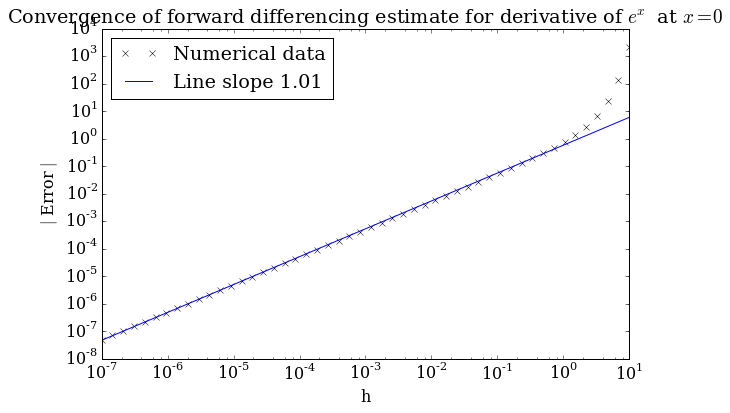

In [3]:
h = np.logspace(-7.0, 1.0)
fd_estimate = (np.exp(h) - np.exp(0.0)) / h
err = np.abs(fd_estimate - 1.0)


# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[:-5]), np.log(err[:-5]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of forward differencing estimate for derivative of $e^x$ at $x = 0$")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

### Central differencing

For more accuracy use a quadratic through the points $\{x_0 - h,
  x_0, x_0 + h\}$:

$$f(x) \simeq g(x) = \alpha (x - x_0)^2 + \beta (x - x_0) + \gamma.$$

Compute the derivative at $x_0$:

$$f'(x_0) = \beta = \frac{f(x_0 + h) - f(x_0 - h)}{2 h}.$$

This *central differencing* estimate is more accurate than
forward/backward differencing:

$$\frac{f(x_0 + h) - f(x_0 - h)}{2 h} = f'(x_0) + {\cal O}(h^2).$$

### Example

Compute the derivative of $f(x) = e^{x}$ at $x=0$ with central
differencing,

$$f'(x_0) = \frac{f(x_0 + h) - f(x_0 - h)}{2 h},$$

checking the error to the exact result $f'(0) \equiv 1$.



| $h$ | Formula | $f'_h(0)$ | Error ratio |
|-----|---------|-----------|-------------|
|0.5  |$\frac{\exp(0.5) - \exp(-0.5)}{1}$ | 1.042 | – |
|0.05 |$\frac{\exp(0.05) - \exp(-0.05)}{0.1}$ | 1.0004167 | 0.00988 |
|0.005 |$\frac{\exp(0.005) - \exp(-0.005)}{0.01}$ | 1.0000004180 | 0.0100 |

Central differencing is much more accurate, and the error ratio is
(asymptotically) the *square* of the step-size ratio.

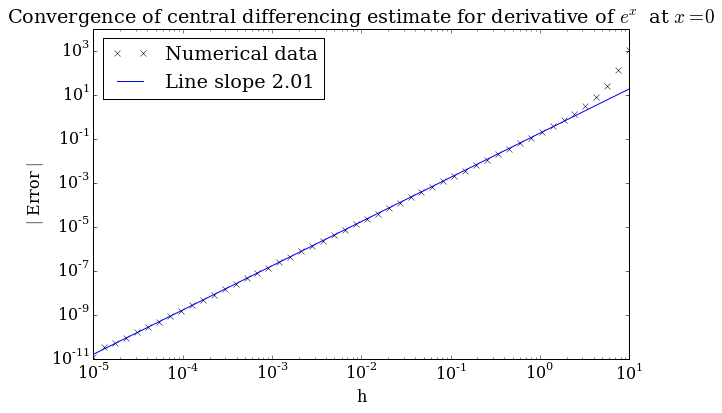

In [4]:
h = np.logspace(-5.0, 1.0)
cd_estimate = (np.exp(h) - np.exp(-h)) / (2.0 * h)
err = np.abs(cd_estimate - 1.0)


# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[:-5]), np.log(err[:-5]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of central differencing estimate for derivative of $e^x$ at $x = 0$")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

### Other numerical differencing formulas

-   Intuitively, use of information from both sides of $x_0$ leads to
    higher accuracy (e.g. central differencing).

-   Can build differencing formulas directly from Taylor series. No
    interpolating function, but are equally valid.

-   Estimates of higher derivatives can use interpolation approach or
    repeated numerical differencing. For example, estimate $f''(x)$
    using forward and backward differencing:

    $$\begin{aligned}
          f''(x_0) & \simeq \frac{f'(x_0) - f'(x_0 - h)}{h} \\
                   & \simeq \frac{\left(f(x_0 + h) - f(x_0) \right) -
                     \left(f(x_0) - f(x_0 - h) \right)}{h^2} \\
                   & = \frac{f(x_0 + h) + f(x_0 - h) - 2 f(x_0)}{h^2}.
        \end{aligned}$$

## Euler’s method

Using differencing construct the simplest method for solving

$${\boldsymbol{y}}'(x) = {\boldsymbol{f}}(x, {\boldsymbol{y}}(x)), \quad {\boldsymbol{y}}(0) = {\boldsymbol{y}}_0.$$

Using step size $h$, apply forward differencing to ${\boldsymbol{y}}$:

$$\frac{{\boldsymbol{y}}_{n+1} - {\boldsymbol{y}}_n}{h} = {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n) \quad
    \Rightarrow \quad {\boldsymbol{y}}_{n+1}  = {\boldsymbol{y}}_n + h {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n).$$

Given initial data ${\boldsymbol{y}}_0$, for each stage we can compute
${\boldsymbol{y}}_{n+1}$ from data ${\boldsymbol{y}}_n$. Methods of this
sort are called *explicit*.

Compute the error using Taylor expansion:

$${\boldsymbol{y}}_{n+1} \equiv {\boldsymbol{y}} \left(x_0 + (n+1) h \right) = {\boldsymbol{y}}_n + h
    {\boldsymbol{f}}(x_n, {\boldsymbol{y}}_n) + {\cal O}(h^2).$$

This means the *local* error is ${\cal O}(h^2)$, not the global error.

### Example

Apply Euler’s method to

$$y'(x) = - \sin(x), \quad y(0) = 1$$

up to $x = 0.5$. Using step size $h = 0.1$ gives

|   $n$ |  $x_n$  | $y_n$   | $f(x_n, y_n) = -\sin(x_n)$   | $\cos(x_n)$   |
|:-----:|:-------:|:-------:|:----------------------------:|:-------------:|
|    0  |   0.0   | 1.00    |          0.000               |  1.000        |
|    1  |   0.1   | 1.00    |          -0.100              |  0.995
|    2  |   0.2   | 0.99    |          -0.199              |  0.980
|    3  |   0.3   | 0.97    |          -0.296              |  0.955
|    4  |   0.4   | 0.94    |          -0.389              |  0.921
|    5  |   0.5   | 0.90    |                              |  0.878

The error is $2.4\%$; using $h = 0.01$ the final result is $y_{50} =
  0.880$, an error of $0.24\%$: first order convergence.

In [5]:
def euler_method(f, x_end, y0, N):
    """Solve IVP y'=f(x, y(x)) on x \in [0, x_end] with y(0) = y0 using N+1 points, using Euler's method."""
    
    h = x_end / N
    x = np.linspace(0.0, x_end, N+1)
    
    y = np.zeros((N+1, len(y0)))
    y[0, :] = y0
    
    for n in range(N):
        y[n+1, :] = y[n, :] + h * f(x[n], y[n, :])
        
    return x, y

def fn_euler_simple(x, y):
    """Simple function for Euler's method example"""
    
    return -np.sin(x)

# Example given above
x_5, y_5 = euler_method(fn_euler_simple, 0.5, [1.0], 5)
x_50, y_50 = euler_method(fn_euler_simple, 0.5, [1.0], 50)

print("Solution at x = 0.5 using h = 0.1 is y = {}.".format(y_5[-1, 0]))
print("Solution at x = 0.5 using h = 0.01 is y = {}.".format(y_50[-1, 0]))

Solution at x = 0.5 using h = 0.1 is y = 0.901655870358812.
Solution at x = 0.5 using h = 0.01 is y = 0.8799807097304118.


### Convergence

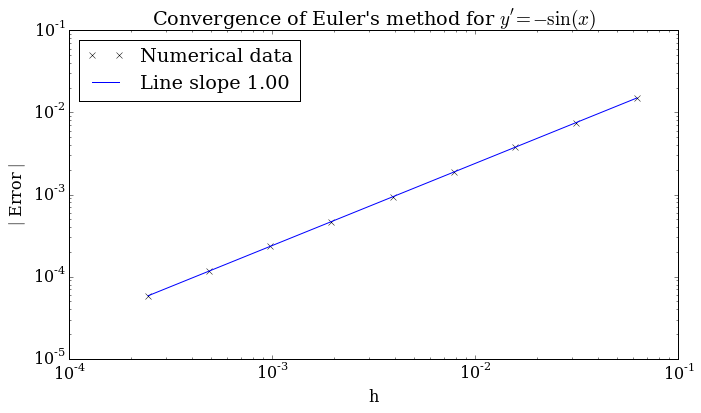

In [6]:
Npoints = np.array([2**i for i in range(3, 12)])
h = 0.5 / Npoints
err = np.zeros_like(h)

for i in range(len(Npoints)):
    N = Npoints[i]
    x, y = euler_method(fn_euler_simple, 0.5, [1.0], N)
    err[i] = np.abs(np.cos(0.5) - y[-1, 0])

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[:-1]), np.log(err[:-1]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of Euler's method for $y' = -\sin(x)$")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

More conclusive evidence that the convergence of Euler’s method is first
order: the global error is $\propto h$.

### Example: 2

Consider the system

$$\left\{
      \begin{aligned}
        \dot{x} & = -y \\ \dot{y} & = x
      \end{aligned} \right., \quad x(0) = 1, \, \, y(0) = 0.$$

In polar coordinates this is $\dot{r} = 0$, $\dot{\phi} = 1$.

Use Euler’s method with $h=0.1$. At $t=50$ the result is slightly out of
phase and the radius has grown significantly.

With $h = 0.01$ the errors are smaller, but still visible.

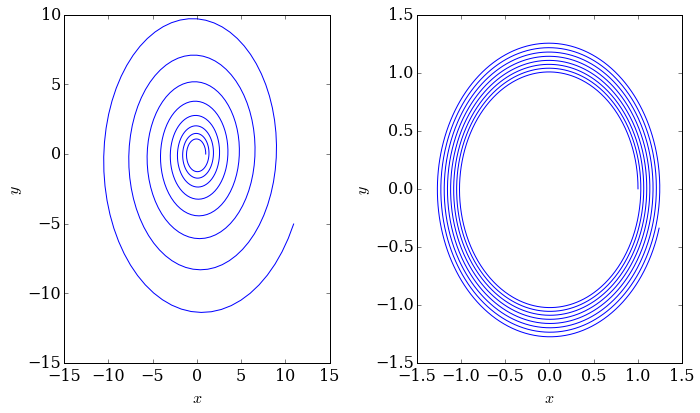

In [7]:
def fn_circular_motion(x, y):
    """Simple function for Euler's method example"""
    
    dfdt = np.zeros_like(y)
    dfdt[0] = -y[1]
    dfdt[1] =  y[0]
    
    return dfdt

# Example given above
y0 = np.array([1.0, 0.0])
t_0_1, y_0_1 = euler_method(fn_circular_motion, 50.0, y0, 500)
t_0_01, y_0_01 = euler_method(fn_circular_motion, 50.0, y0, 5000)

  
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(121)
ax1.plot(y_0_1[:, 0], y_0_1[:, 1], 'b-', label = '$h = 0.1$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax2 = fig.add_subplot(122)
ax2.plot(y_0_01[:, 0], y_0_01[:, 1], 'b-', label = '$h = 0.01$')
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
fig.tight_layout()
plt.show()

### Convergence: 2

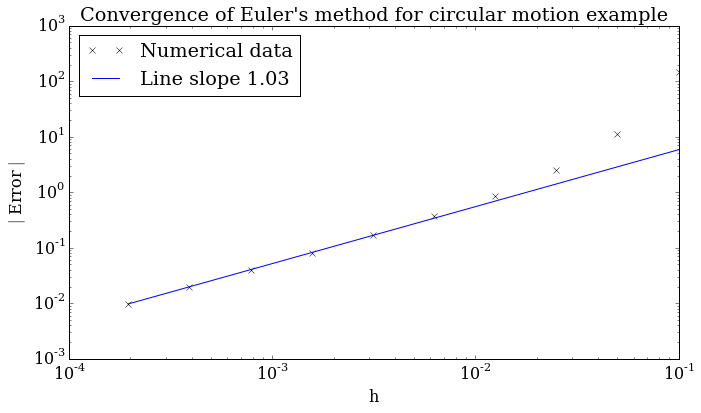

In [8]:
Npoints = np.array([500*2**i for i in range(0, 10)])
h = np.zeros_like(Npoints, float)
h = 50.0 / Npoints
err = np.zeros_like(h)

for i in range(len(Npoints)):
    N = Npoints[i]
    x, y = euler_method(fn_circular_motion, 50.0, y0, N)
    err[i] = np.abs(y[-1, 0]**2 + y[-1, 1]**2 - 1.0)

# Find the best fit to the data: if err ~ A h^s then the best fit straight line of log(err) vs log(h) has slope s.
p = np.polyfit(np.log(h[5:]), np.log(err[5:]), 1)
    
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.loglog(h, err, 'kx', label = 'Numerical data')
ax.loglog(h, np.exp(p[1])*h**(p[0]), 'b-', label = "Line slope {:.2f}".format(p[0]))
ax.set_xlabel('h')
ax.set_ylabel('$\|$ Error $\|$')
ax.set_title("Convergence of Euler's method for circular motion example")
ax.legend(loc = 2)
fig.tight_layout()
plt.show()

More conclusive evidence that the convergence of Euler’s method is
(asymptotically) first order: the global error is $\propto h$.